In [ ]:
cd drive

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
cd Global\ Terrorism

/content/drive/My Drive/Global Terrorism


### **Importing Libraries**

In [ ]:
import pandas as pd
df= pd.read_csv("data.csv",encoding='ISO-8859-1',low_memory=False)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head(5)

,Unnamed: 0,latitude,longitude,nperpcap,nkill,nkillter,nwound,nwoundte,eventid,iyear,imonth,iday,extended,crit1,crit2,crit3,multiple,country,country_txt,region,region_txt,city,specificity,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,gname,claimed,property,doubtterr
0,0,-0.444783,-1.540087,0.074550,0.444343,-0.360005,-0.770908,-0.149083,197000000001,1970,7,2.0,0,1,1,1,0.0,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,1.0,1,Assassination,1,0,13,Unknown,14,Private Citizens & Property,58.0,Dominican Republic,0,MANO-D,NaN,0.0,0.0
1,1,-0.388388,-1.798341,0.074550,-0.924496,-0.360005,-0.770908,-0.149083,197000000002,1970,0,NaN,0,1,1,1,0.0,130,Mexico,1,North America,Mexico city,1.0,6,Hostage Taking (Kidnapping),1,0,13,Unknown,7,Government (Diplomatic),21.0,Belgium,0,23rd of September Communist League,NaN,0.0,0.0
2,2,-0.625239,2.054074,-0.698187,0.444343,0.577422,-0.770908,-0.149083,197001000001,1970,1,NaN,0,1,1,1,0.0,160,Philippines,5,Southeast Asia,Unknown,4.0,1,Assassination,1,0,13,Unknown,10,Journalists & Media,217.0,United States,0,Unknown,NaN,0.0,0.0
3,3,0.833952,-0.353311,1.800576,-0.924496,-0.047530,-0.770908,-0.149083,197001000002,1970,1,NaN,0,1,1,1,0.0,78,Greece,8,Western Europe,Athens,1.0,3,Bombing/Explosion,1,0,6,Explosives,7,Government (Diplomatic),217.0,United States,0,Unknown,NaN,1.0,0.0
4,5,-2.298085,-1.413866,0.074550,-0.924496,-0.360005,-0.770908,-0.149083,197001010002,1970,1,1.0,0,1,1,1,0.0,217,United States,1,North America,Cairo,1.0,2,Armed Assault,1,0,5,Firearms,3,Police,217.0,United States,0,Black Nationalists,0.0,1.0,0.0


In [ ]:
df.shape

(167906, 38)

In [ ]:
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'nperpcap', 'nkill', 'nkillter',
       'nwound', 'nwoundte', 'eventid', 'iyear', 'imonth', 'iday', 'extended',
       'crit1', 'crit2', 'crit3', 'multiple', 'country', 'country_txt',
       'region', 'region_txt', 'city', 'specificity', 'attacktype1',
       'attacktype1_txt', 'success', 'suicide', 'weaptype1', 'weaptype1_txt',
       'targtype1', 'targtype1_txt', 'natlty1', 'natlty1_txt', 'individual',
       'gname', 'claimed', 'property', 'doubtterr'],
      dtype='object')

### **Correlation Matrix**

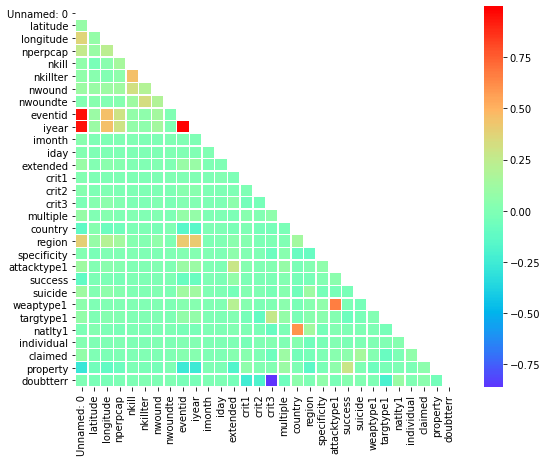

In [ ]:
plt.figure(figsize=(10,7))
corr_back = df.corr()


mask = np.zeros_like(corr_back, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_back, mask=mask, center=0, square=True, linewidths=.5,cmap='rainbow')
plt.show()

There is very less multicollinearity among the predictor variables in the dataset.

#**VISUALIZATIONS**

### **1. Number Of Terrorist Activities Each Year**

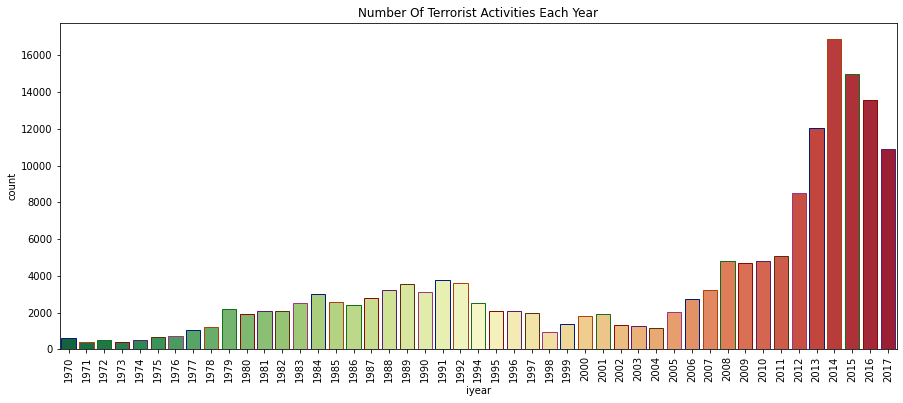

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

Highest number of attacks were recorded in 2014.

### **2. Attacking Methods used by Terrorists**

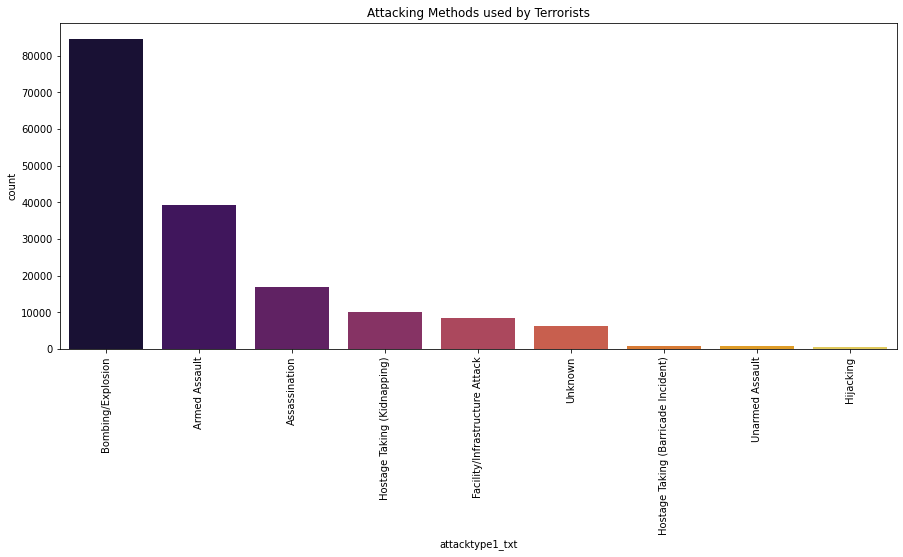

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=df,palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods used by Terrorists')
plt.show()

This graph represents the various attacking methods used by terrorists and the most common were bombing and explosion

###**3. Favorite Targets Of Terrorists**

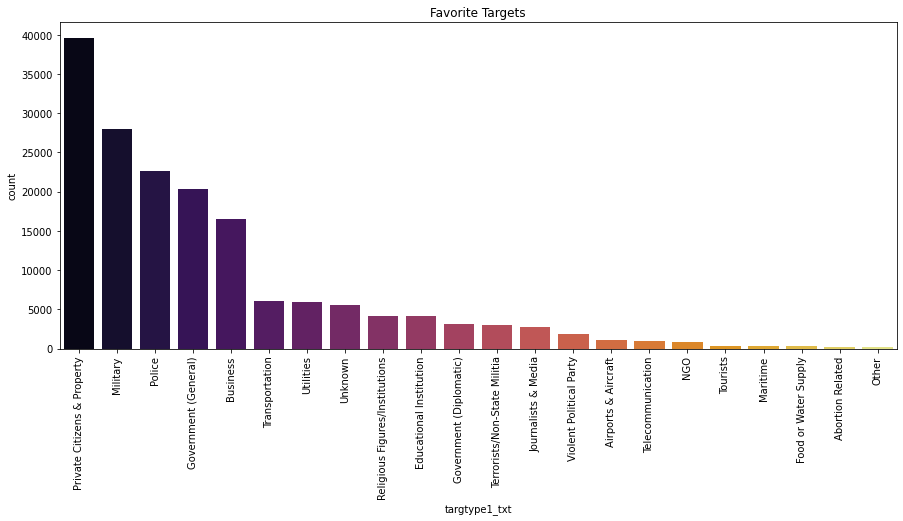

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(df['targtype1_txt'],palette='inferno',order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

From the above graph, it can be seen that the Favorite Targets of the perpetrators are: Private Citizens and Property, Military and the Police.

### **4. Number Of Terrorist Activities By Region**


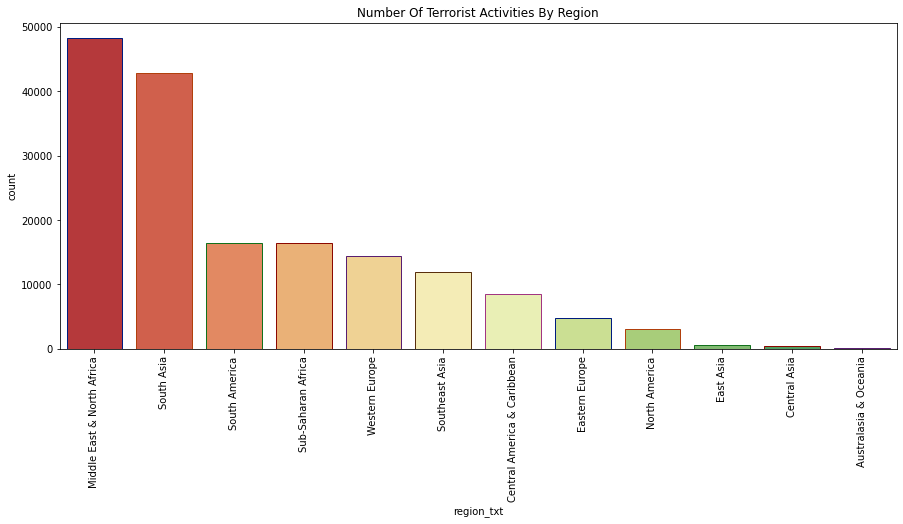

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

The greatest number of insurgencies are in: Middle East and North Africa, South Asia, South America.

### **5. Yearly Number Of Terrorist Activities By Region**

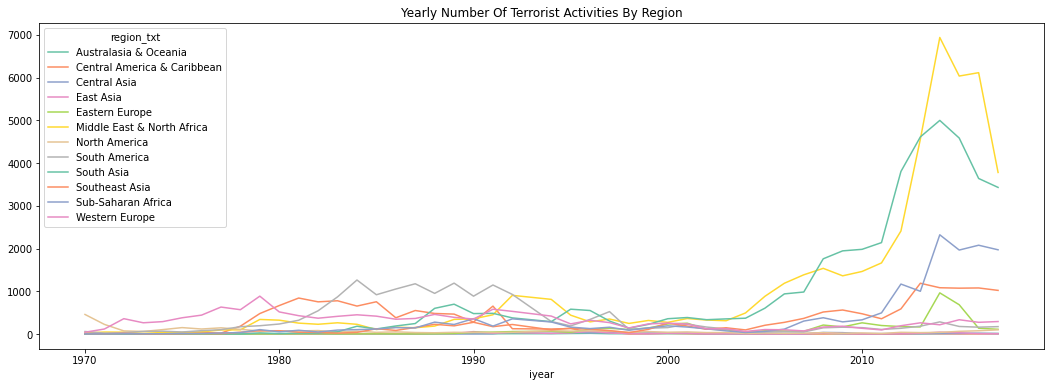

In [ ]:
terror_region=pd.crosstab(df.iyear,df.region_txt)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Yearly Number Of Terrorist Activities By Region')
plt.show()

The figure above shows that the region with highest Attacks throughout years are in Middle East and North Africa.

### **6. Attacks in every Region**

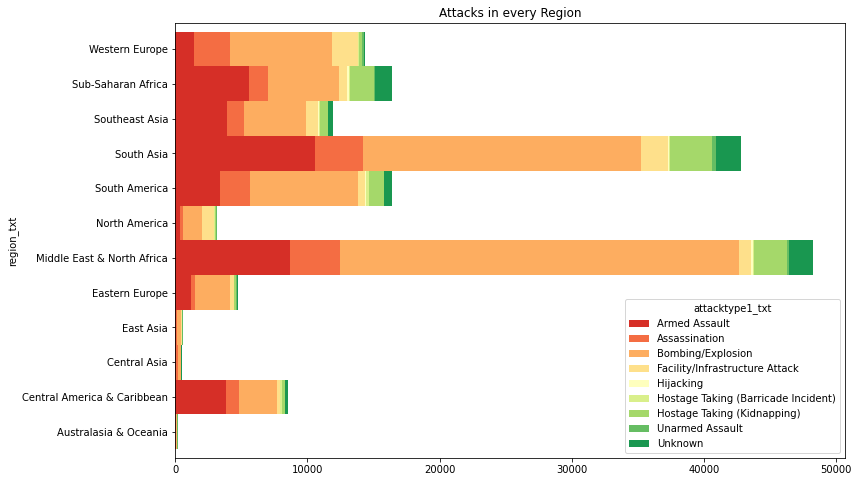

In [ ]:
pd.crosstab(df.region_txt,df.attacktype1_txt).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Attacks in every Region')
plt.show()

Various attack types that took place in various regions.Attacks are mostly occurring in Middle East and North Africa and the most common attack type was bombing and explosion.

### **7. Top Affected Countries**

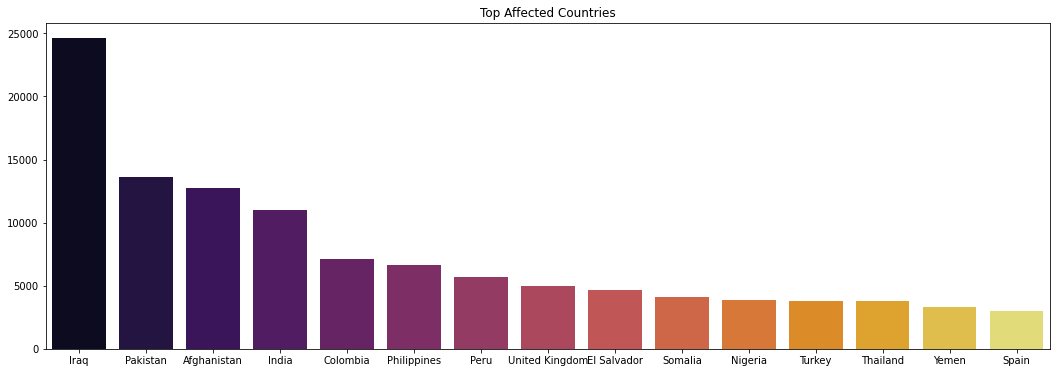

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(df['country_txt'].value_counts()[:15].index,df['country_txt'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

Some of the top affected countries are Iraq, Pakistan, Afghanistan and India

### **8. Terrorist Groups with Highest Terror Attacks**

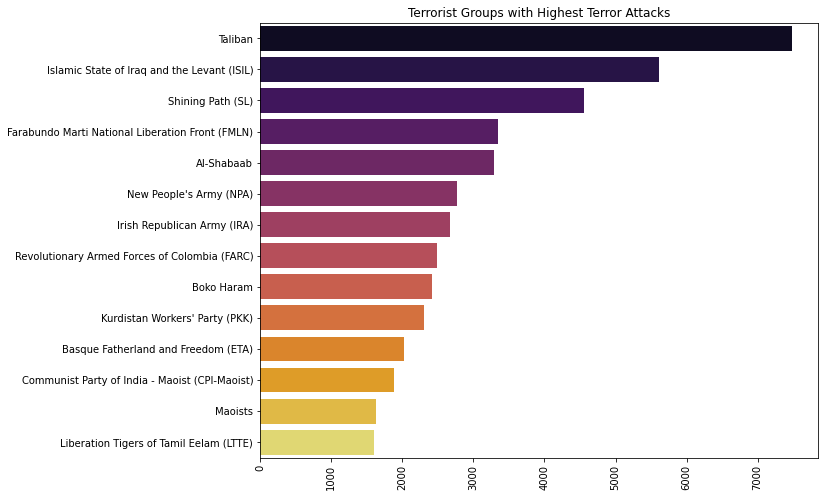

In [ ]:
sns.barplot(df['gname'].value_counts()[1:15].values,df['gname'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

The terrorist Groups that have led to the greatest number of terrorist activities are: Taliban, Islamic State of Iraq and Levant and Shining Path.

# **5. MODEL BUILDING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167906 entries, 0 to 167905
Data columns (total 38 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       167906 non-null  int64  
 1   latitude         167906 non-null  float64
 2   longitude        167906 non-null  float64
 3   nperpcap         167906 non-null  float64
 4   nkill            167906 non-null  float64
 5   nkillter         167906 non-null  float64
 6   nwound           167906 non-null  float64
 7   nwoundte         167906 non-null  float64
 8   eventid          167906 non-null  int64  
 9   iyear            167906 non-null  int64  
 10  imonth           167906 non-null  int64  
 11  iday             167156 non-null  float64
 12  extended         167906 non-null  int64  
 13  crit1            167906 non-null  int64  
 14  crit2            167906 non-null  int64  
 15  crit3            167906 non-null  int64  
 16  multiple         167905 non-null  floa

In [ ]:
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'nperpcap', 'nkill', 'nkillter',
       'nwound', 'nwoundte', 'eventid', 'iyear', 'imonth', 'iday', 'extended',
       'crit1', 'crit2', 'crit3', 'multiple', 'country', 'country_txt',
       'region', 'region_txt', 'city', 'specificity', 'attacktype1',
       'attacktype1_txt', 'success', 'suicide', 'weaptype1', 'weaptype1_txt',
       'targtype1', 'targtype1_txt', 'natlty1', 'natlty1_txt', 'individual',
       'gname', 'claimed', 'property', 'doubtterr'],
      dtype='object')

Dropping few columns that are not necessary for model building.

In [ ]:
df1=df.dropna(axis=0)

In [ ]:
df1=df1.drop(['Unnamed: 0','eventid','iyear','imonth','iday','country_txt','region_txt','attacktype1_txt','weaptype1_txt','targtype1_txt','natlty1_txt'],axis=1)

##### **Label Encoding**

In [ ]:
# Labelencoding the 'city' and 'gname' variables

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['city']= label_encoder.fit_transform(df1['city'])
df1['gname']= label_encoder.fit_transform(df1['gname'])

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
df1.head()

,latitude,longitude,nperpcap,nkill,nkillter,nwound,nwoundte,extended,crit1,crit2,crit3,multiple,country,region,city,specificity,attacktype1,success,suicide,weaptype1,targtype1,natlty1,individual,gname,claimed,property,doubtterr
4,-2.298085,-1.413866,0.074550,-0.924496,-0.360005,-0.770908,-0.149083,0,1,1,1,0.0,217,1,4438,1.0,2,1,0,5,3,217.0,0,336,0.0,1.0,0.0
6,1.186852,-1.713734,0.212670,-0.924496,-0.360005,-0.770908,-0.149083,0,1,1,1,0.0,217,1,16594,1.0,3,1,0,6,21,217.0,0,1498,0.0,1.0,1.0
7,1.186596,-1.713507,0.212670,-0.924496,-0.360005,-0.770908,-0.149083,0,1,1,1,0.0,217,1,13556,1.0,7,1,0,8,4,217.0,0,1016,1.0,1.0,0.0
8,1.214369,-1.716653,-2.436532,-0.924496,-0.360005,-0.770908,-0.149083,0,1,1,1,0.0,217,1,13556,1.0,7,1,0,8,2,217.0,0,1016,0.0,1.0,0.0
10,1.134659,-1.657487,-5.837894,-0.924496,-0.360005,-0.770908,-0.149083,0,1,1,1,0.0,217,1,6095,1.0,7,1,0,8,4,217.0,0,819,0.0,1.0,1.0


### **Train and Test Split**

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

X=df1.drop(['doubtterr'],axis=1)
Y=df1['doubtterr']
from sklearn.model_selection import train_test_split


#### **Scaling the data/Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=2)

### **Model Testing**

### **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.9741510943066968

In [ ]:
# print classification report 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     23103
         1.0       1.00      0.84      0.91      4403

    accuracy                           0.97     27506
   macro avg       0.98      0.92      0.95     27506
weighted avg       0.97      0.97      0.97     27506



**Confusion Matrix**

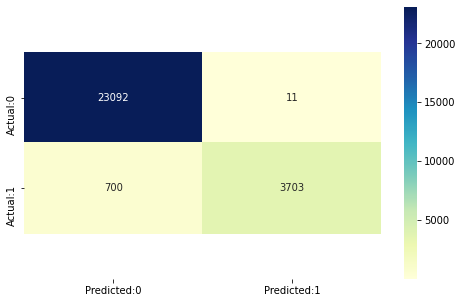

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

**K Fold cross validation**

In [ ]:
# K Fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score

name='Logistic Regression'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Logistic Regression: 0.972428 (0.000001)
cross validation scores:  [0.97189059 0.97246359 0.9733996  0.97094064 0.97344414]
Bias error:  2.7572287760646823
variance error:  0.011197154817155698


### **2. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.9540463898785719

In [ ]:
# print classification report 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     23103
         1.0       0.85      0.87      0.86      4403

    accuracy                           0.95     27506
   macro avg       0.91      0.92      0.92     27506
weighted avg       0.95      0.95      0.95     27506



**Confusion Matrix**

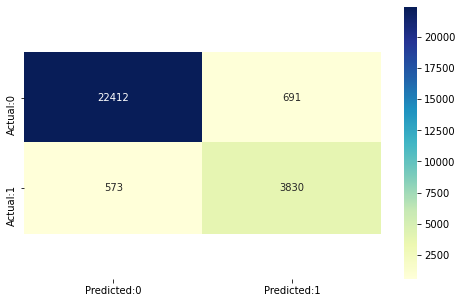

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

**K Fold cross validation**

In [ ]:
# Cross validation score

name='Decision Tree'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Decision Tree: 0.952429 (0.000002)
cross validation scores:  [0.95252028 0.95354546 0.94990219 0.95332114 0.95285474]
Bias error:  4.757123716139439
variance error:  0.021541962095799266


### **3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators = 100)

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.9742601614193267

In [ ]:
# print classification report 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     23103
         1.0       0.99      0.85      0.91      4403

    accuracy                           0.97     27506
   macro avg       0.98      0.92      0.95     27506
weighted avg       0.97      0.97      0.97     27506



**Confusion Matrix**

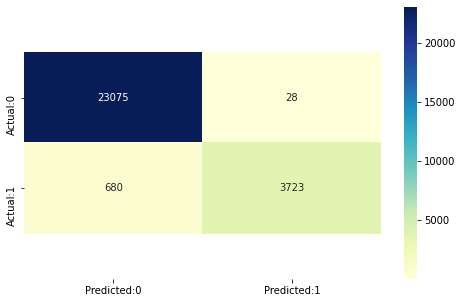

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

**K Fold cross validation**

In [ ]:
# Cross validation score

name='Random Forest'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Random Forest: 0.972961 (0.000001)
cross validation scores:  [0.97202576 0.97282395 0.97393023 0.97164894 0.97437725]
Bias error:  2.703877560612349
variance error:  0.013900324205717575


### **4. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.9706609467025377

In [ ]:
# print classification report 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     23103
         1.0       0.97      0.84      0.90      4403

    accuracy                           0.97     27506
   macro avg       0.97      0.92      0.94     27506
weighted avg       0.97      0.97      0.97     27506



**Confusion Matrix**

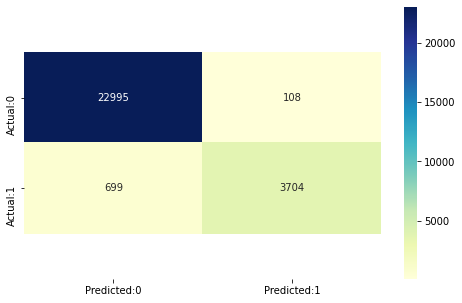

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

**K Fold cross validation**

In [ ]:
# Cross validation score

name='KNN'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

KNN: 0.969297 (0.000001)
cross validation scores:  [0.9695715  0.96854872 0.97020054 0.96796192 0.97020048]
Bias error:  3.0703369015499327
variance error:  0.010125924035398883


### **5. Naive Bayes Classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.9718606849414673

In [ ]:
# print classification report 
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     23103
         1.0       0.98      0.85      0.91      4403

    accuracy                           0.97     27506
   macro avg       0.97      0.92      0.94     27506
weighted avg       0.97      0.97      0.97     27506



**Confusion Matrix**

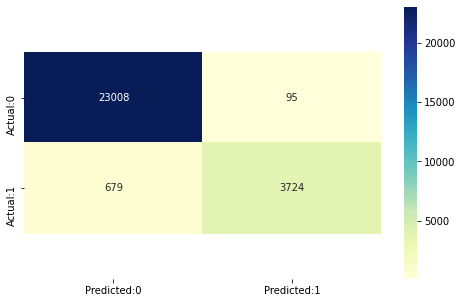

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

**K Fold cross validation**

In [ ]:
# Cross validation score

name='Naive Byes Classification'
kfold = KFold(shuffle=True,n_splits=5,random_state=1)
cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring='f1_weighted')
print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))

print('cross validation scores: ',cv_results)
# Bias error
print('Bias error: ',np.mean((1-cv_results)*100))

# Variance error
print('variance error: ',np.var((1-cv_results)*100,ddof=1))

Naive Byes Classification: 0.969483 (0.000001)
cross validation scores:  [0.96906029 0.96969223 0.97052743 0.96815993 0.96997567]
Bias error:  3.0516889775756946
variance error:  0.008266294821492123
